In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score,accuracy_score,roc_curve
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 12)

In [4]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [5]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df["country"].unique()
array1=np.array
array1(['France','Spain','Germany'],dtype = object)
df['country']= df.country.replace({"France":0,"Spain":1,"Germany":2})
df["country"].unique()
array1([0,1,2] ,dtype = np.int64)
df["gender"]= df.gender.replace({"Female":0,"Male":1})
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_632\4131936001.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country']= df.country.replace({"France":0,"Spain":1,"Germany":2})
C:\Users\Administrator\AppData\Local\Temp\ipykernel_632\4131936001.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"]= df.gender.replace({"Female":0,"Male":1})


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Feature Selection
#Filter method (before model training)

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Correlation Method

In [12]:
df.corr()      #pearson correlation

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.000821,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,0.008267,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.000821,0.008267,1.000000,-0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
gender,-0.002641,-0.002857,-0.016936,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,0.009497,-0.003965,0.048092,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,0.001418,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.348700,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.006180,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,0.004036,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,-0.012692,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


<Axes: >

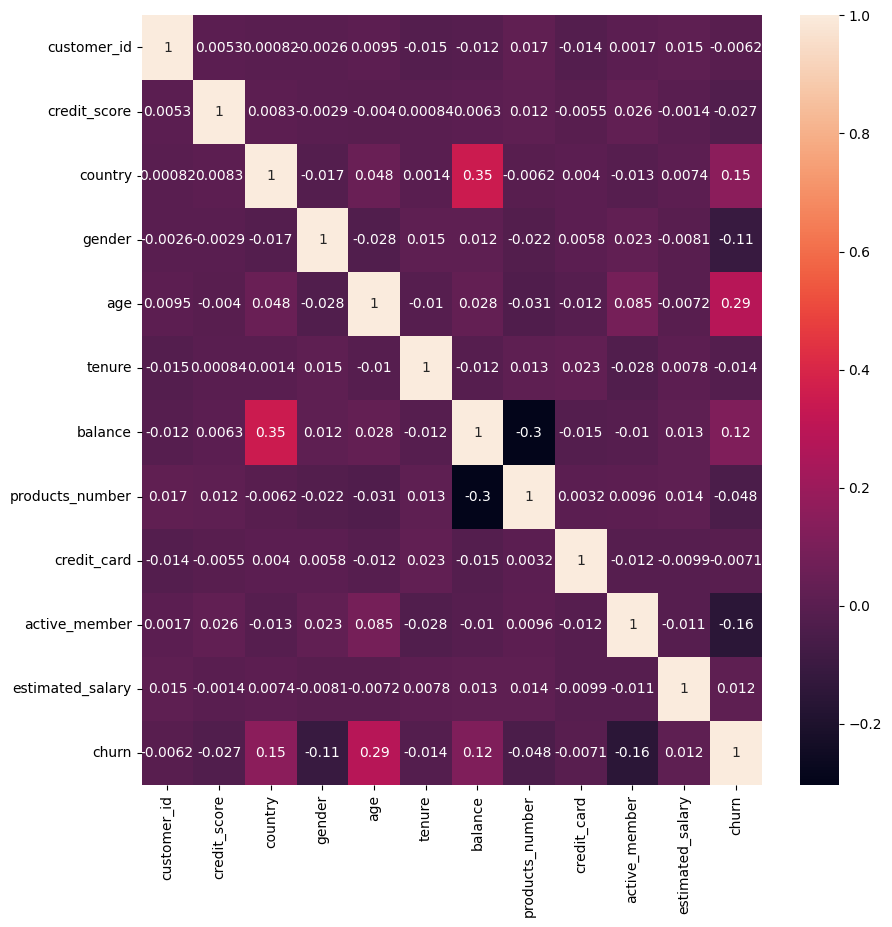

In [13]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), annot = True)

<Axes: >

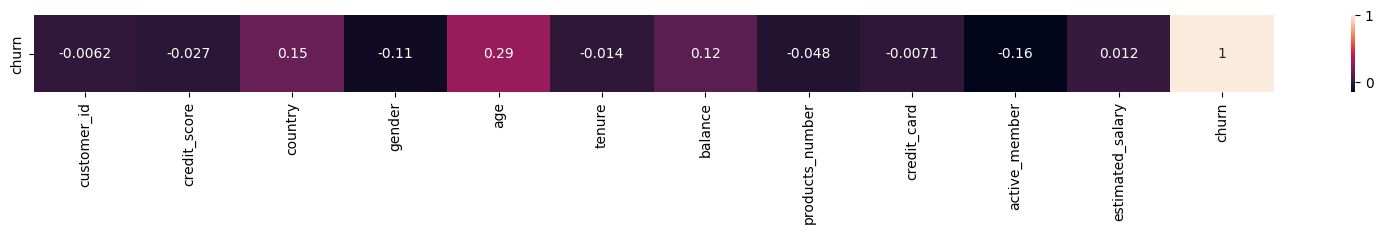

In [14]:
corr = df.corr().tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot = True)

<Axes: >

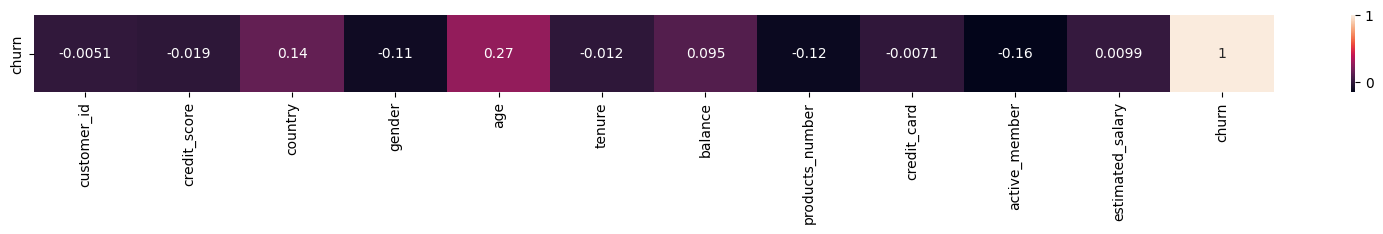

In [15]:
# kendall method
corr2 = df.corr(method = "kendall").tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr2,annot= True)


<Axes: >

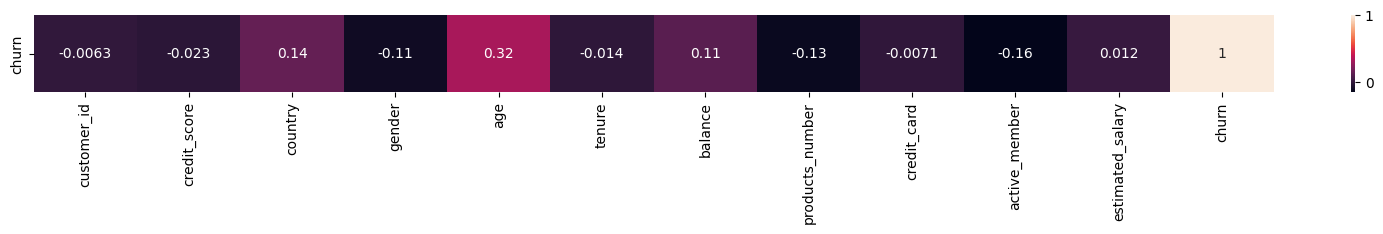

In [16]:
#Spearman Methods
corr3 = df.corr(method = "spearman").tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr3,annot= True)

In [17]:
# Feature Engineering 
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

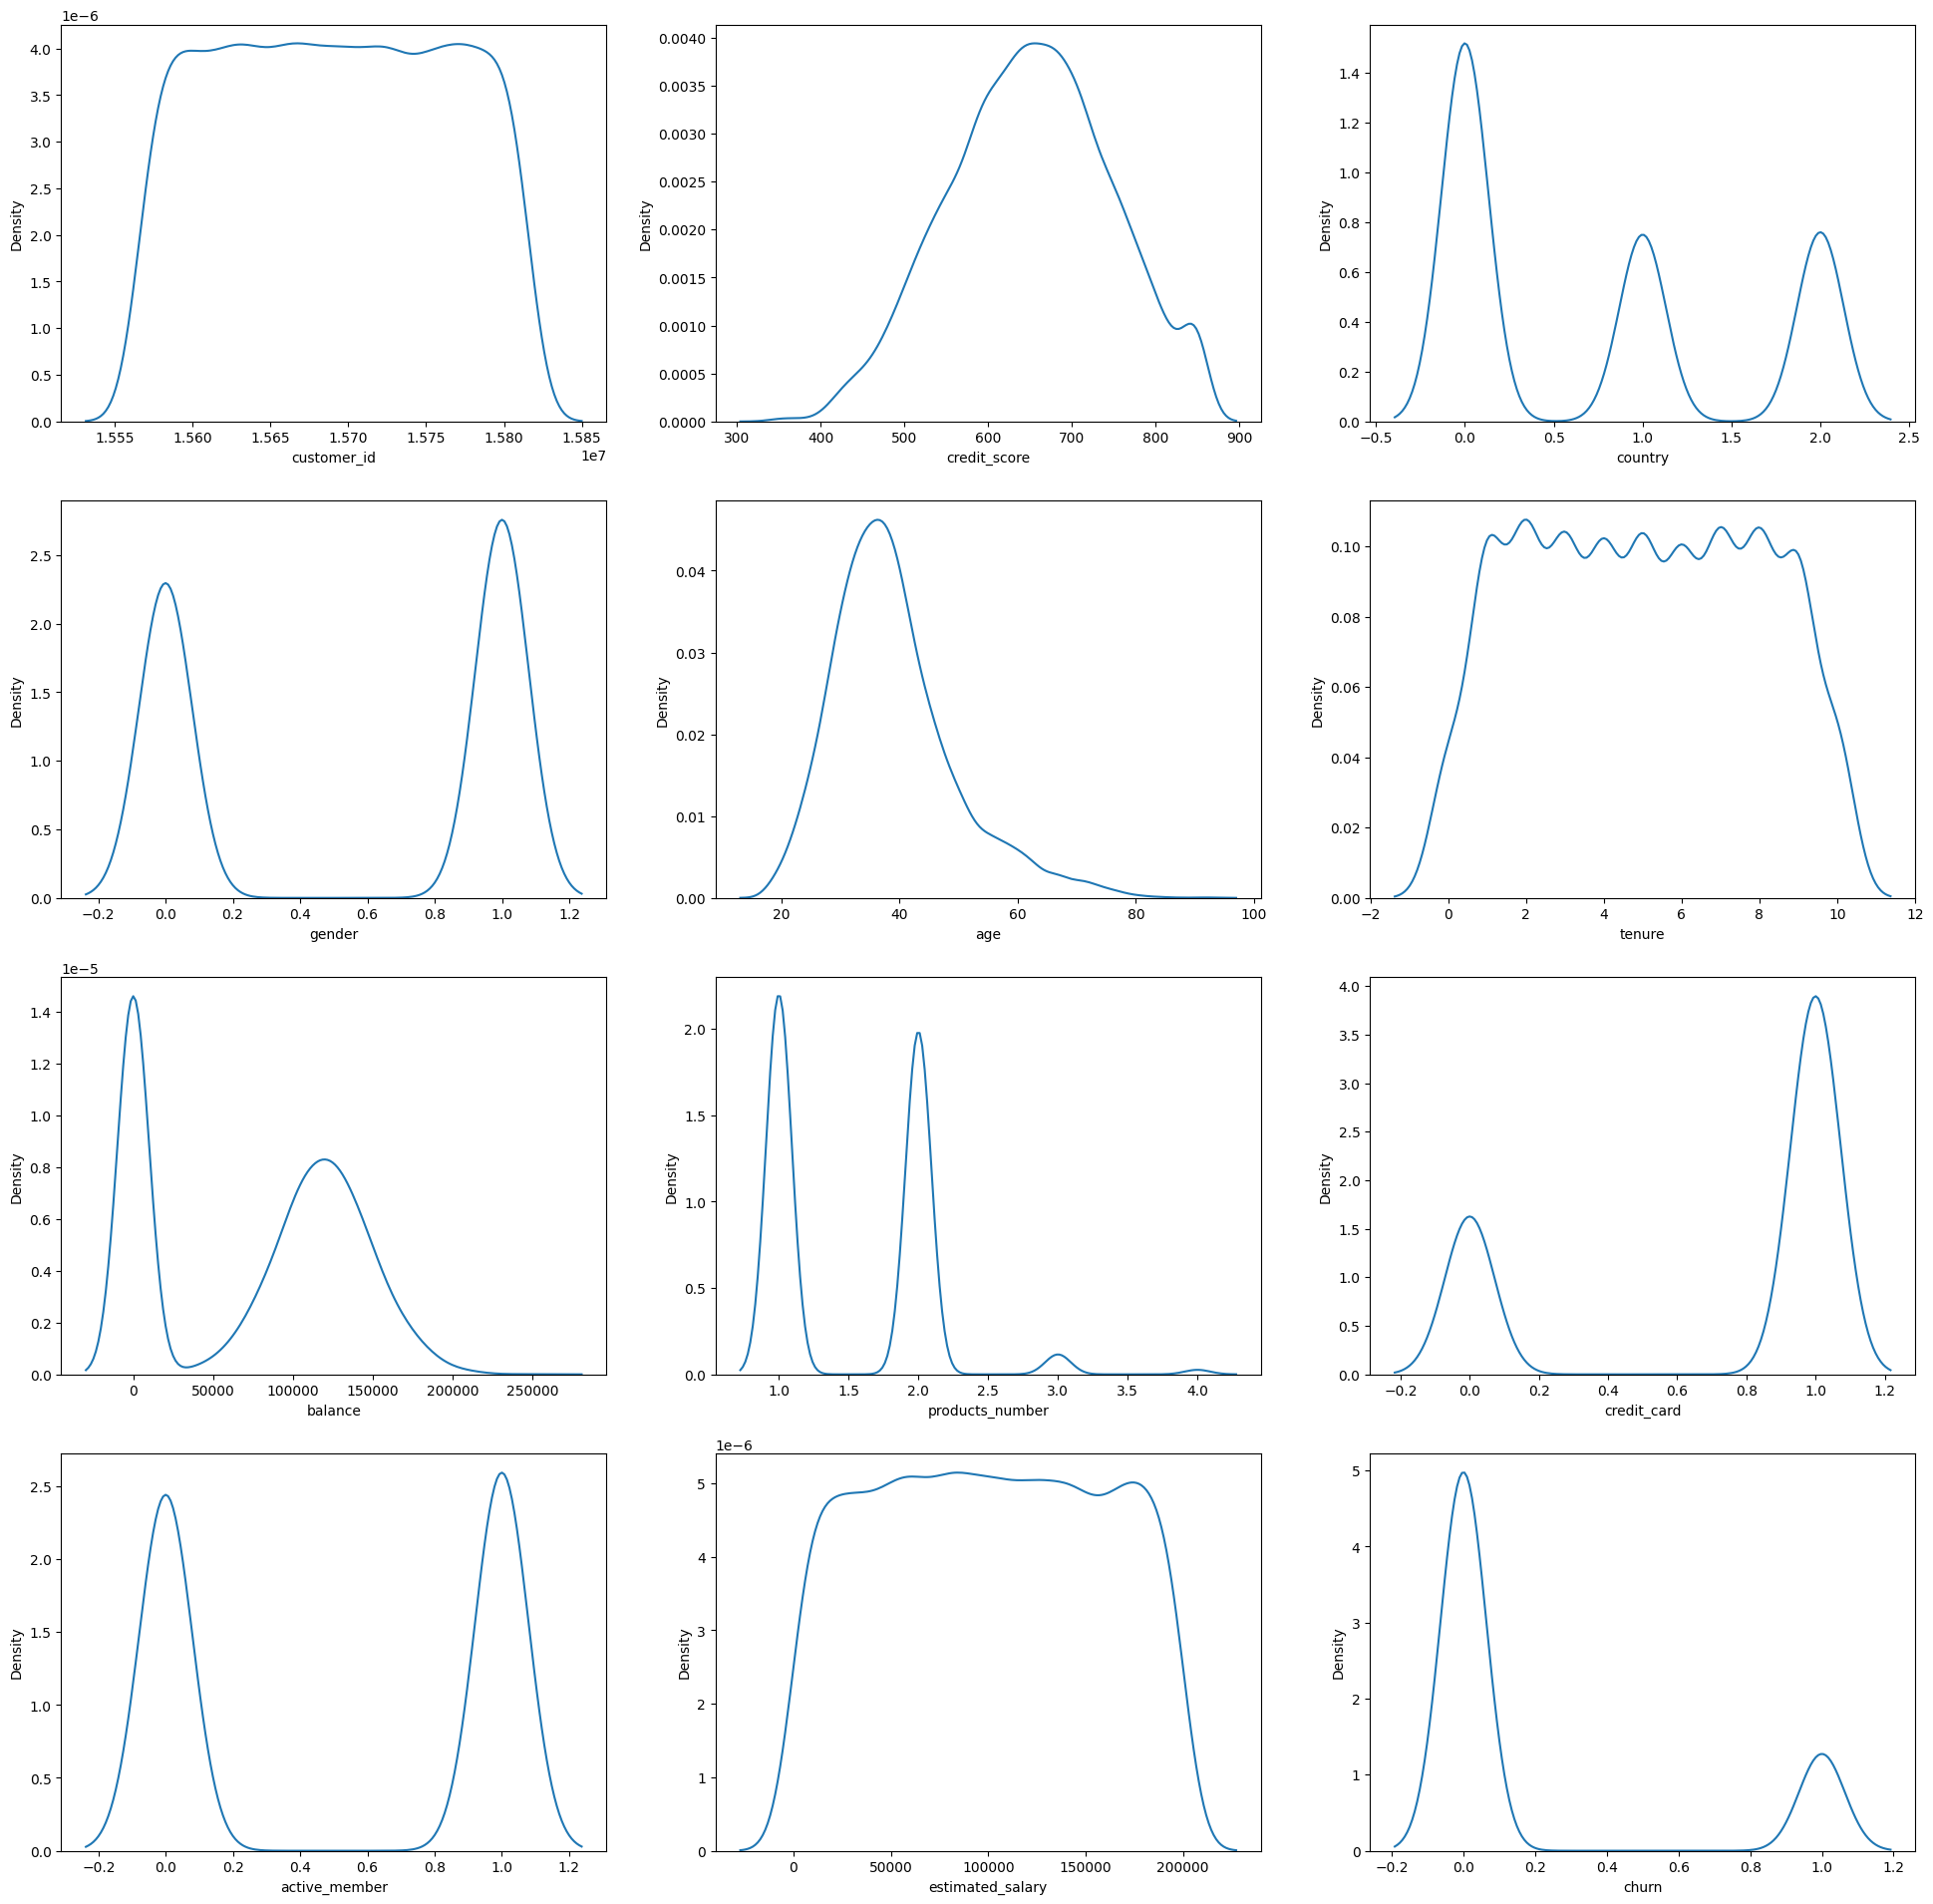

In [18]:
i=1
plt.figure(figsize=(24,30))
for col in df.columns:
    plt.subplot(5,3,i)
    sns.kdeplot(df[col])
    i+=1

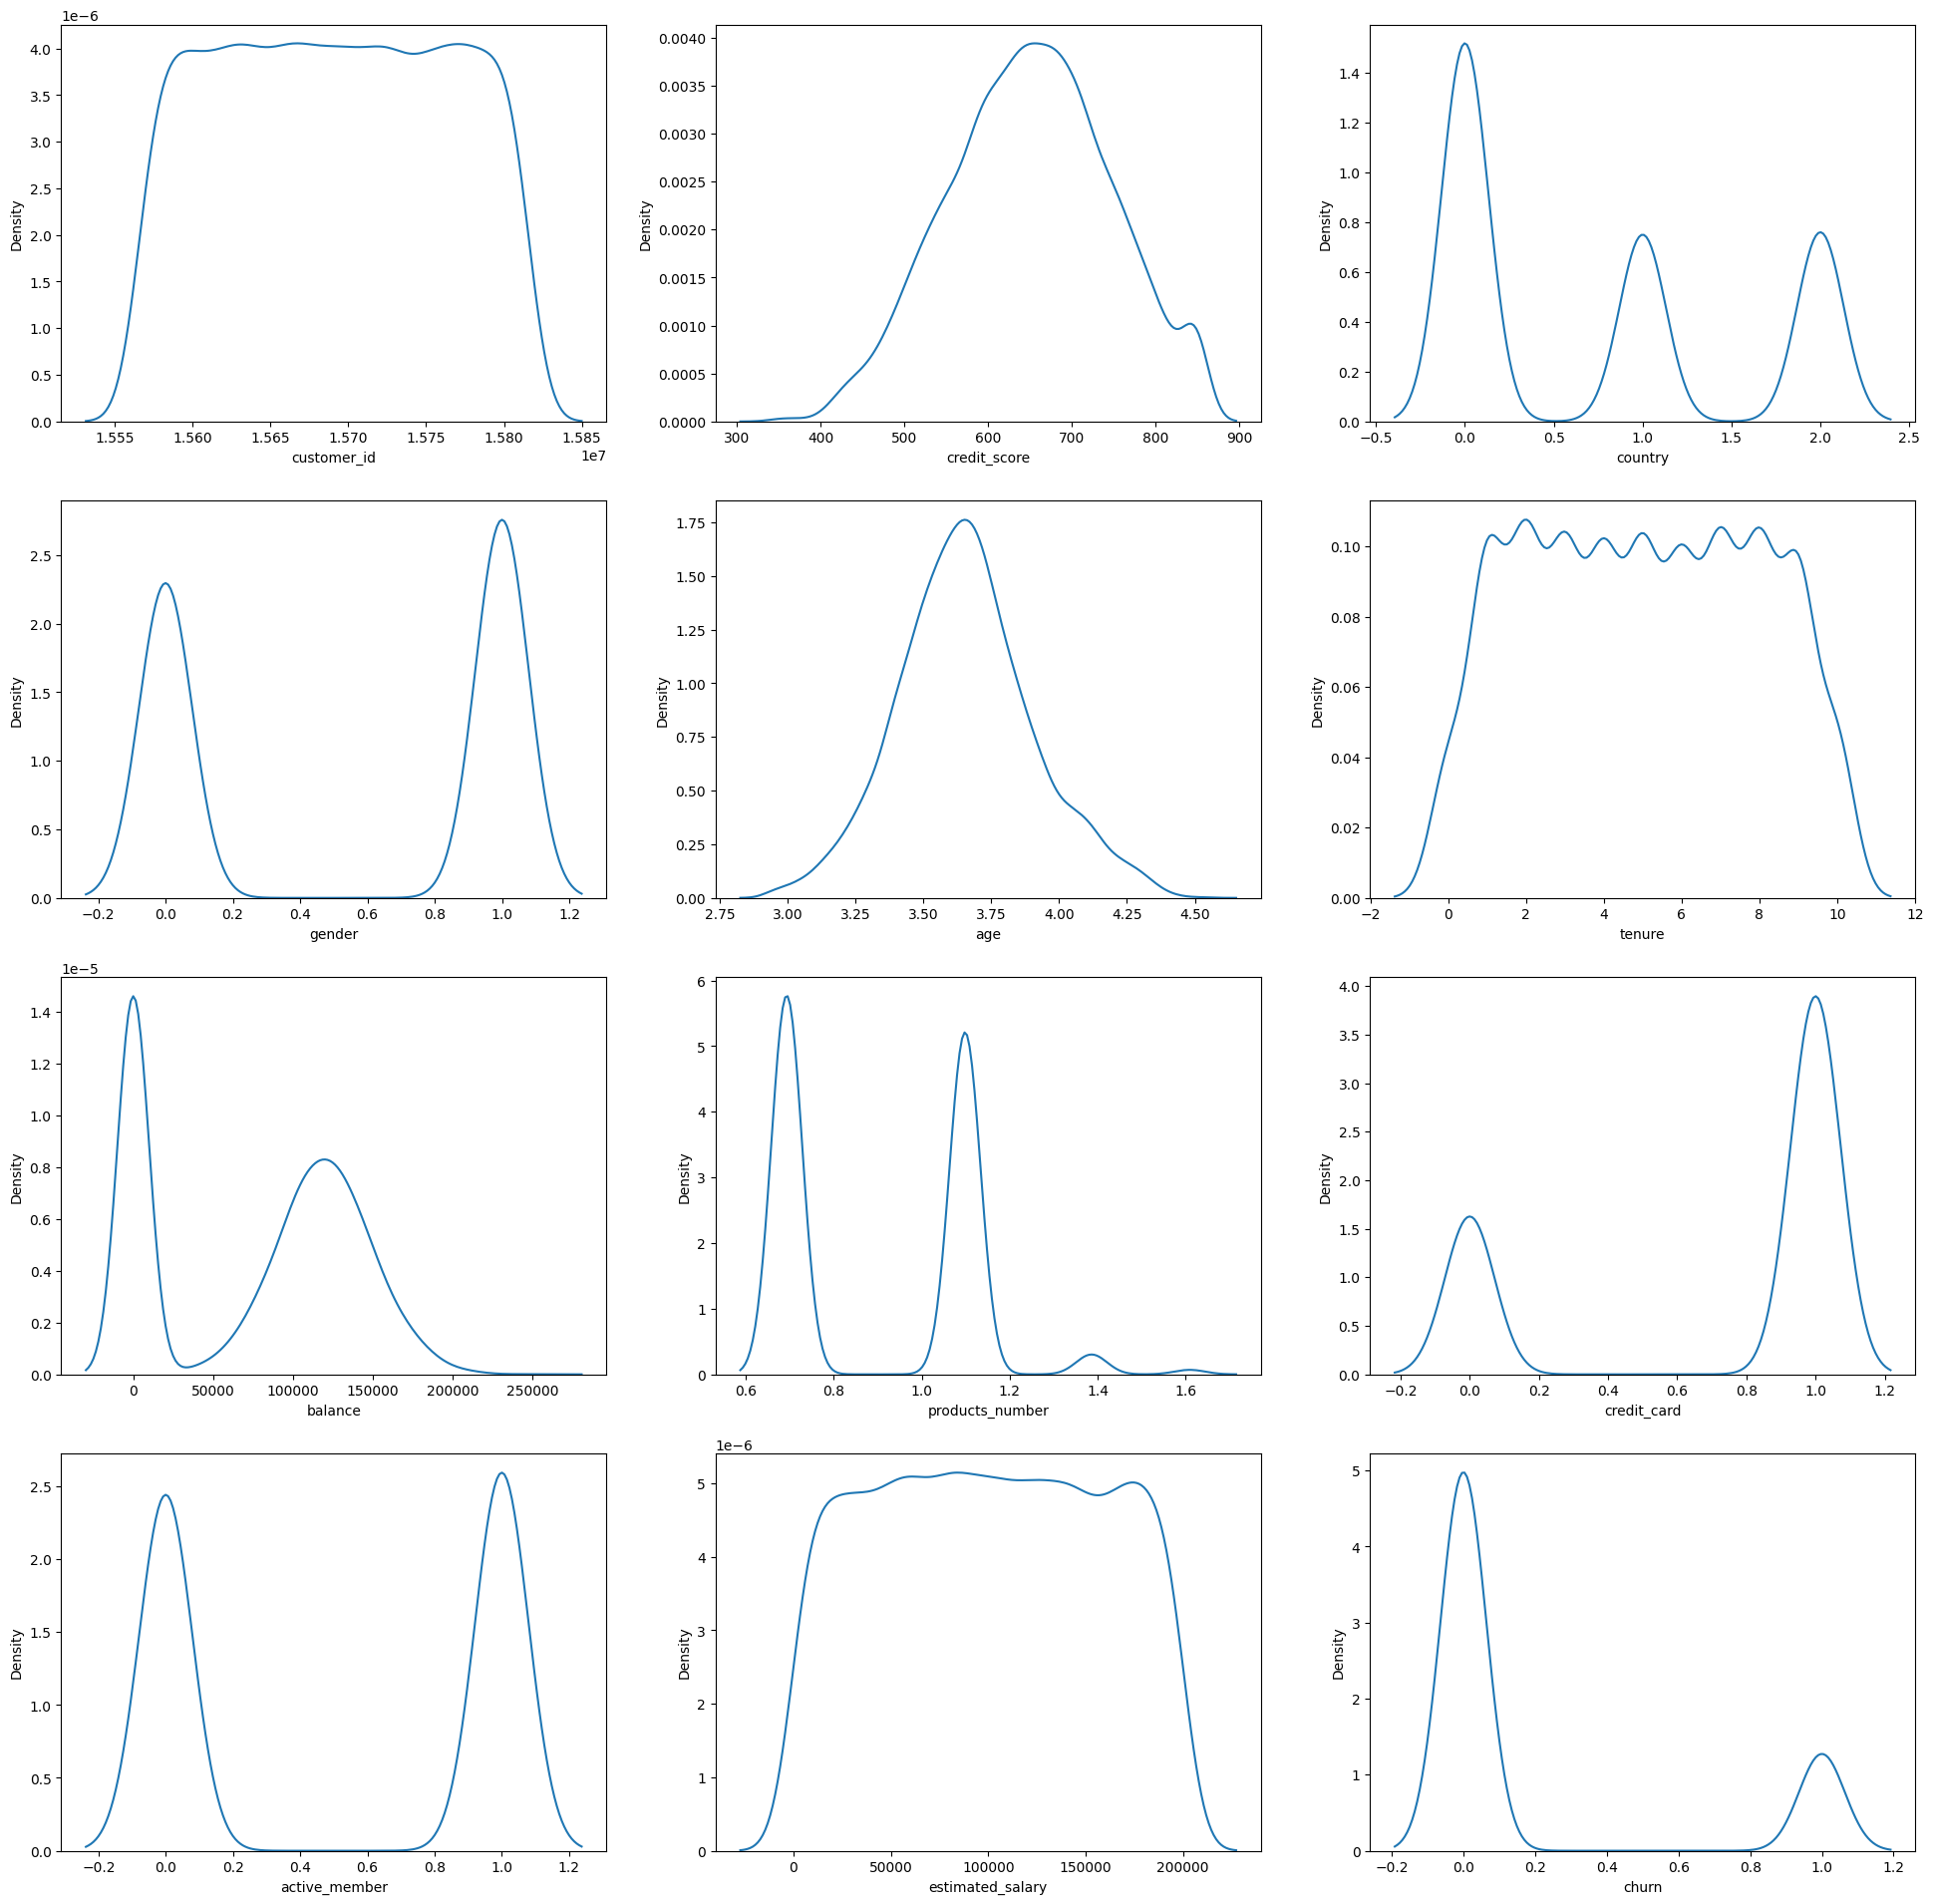

In [19]:
#Remove Skew data
for col in df.loc[:,"credit_score":"estimated_salary"].columns:
    if df[col].skew()>0.5:
        df[col]=np.log1p(df[col])
    elif df[col].skew()<-0.5:
        df[col]=np.sqrt(df[col])

i=1
plt.figure(figsize=(24,30))
for col in df.columns:
    plt.subplot(5,3,i)
    sns.kdeplot(df[col])
    i+=1

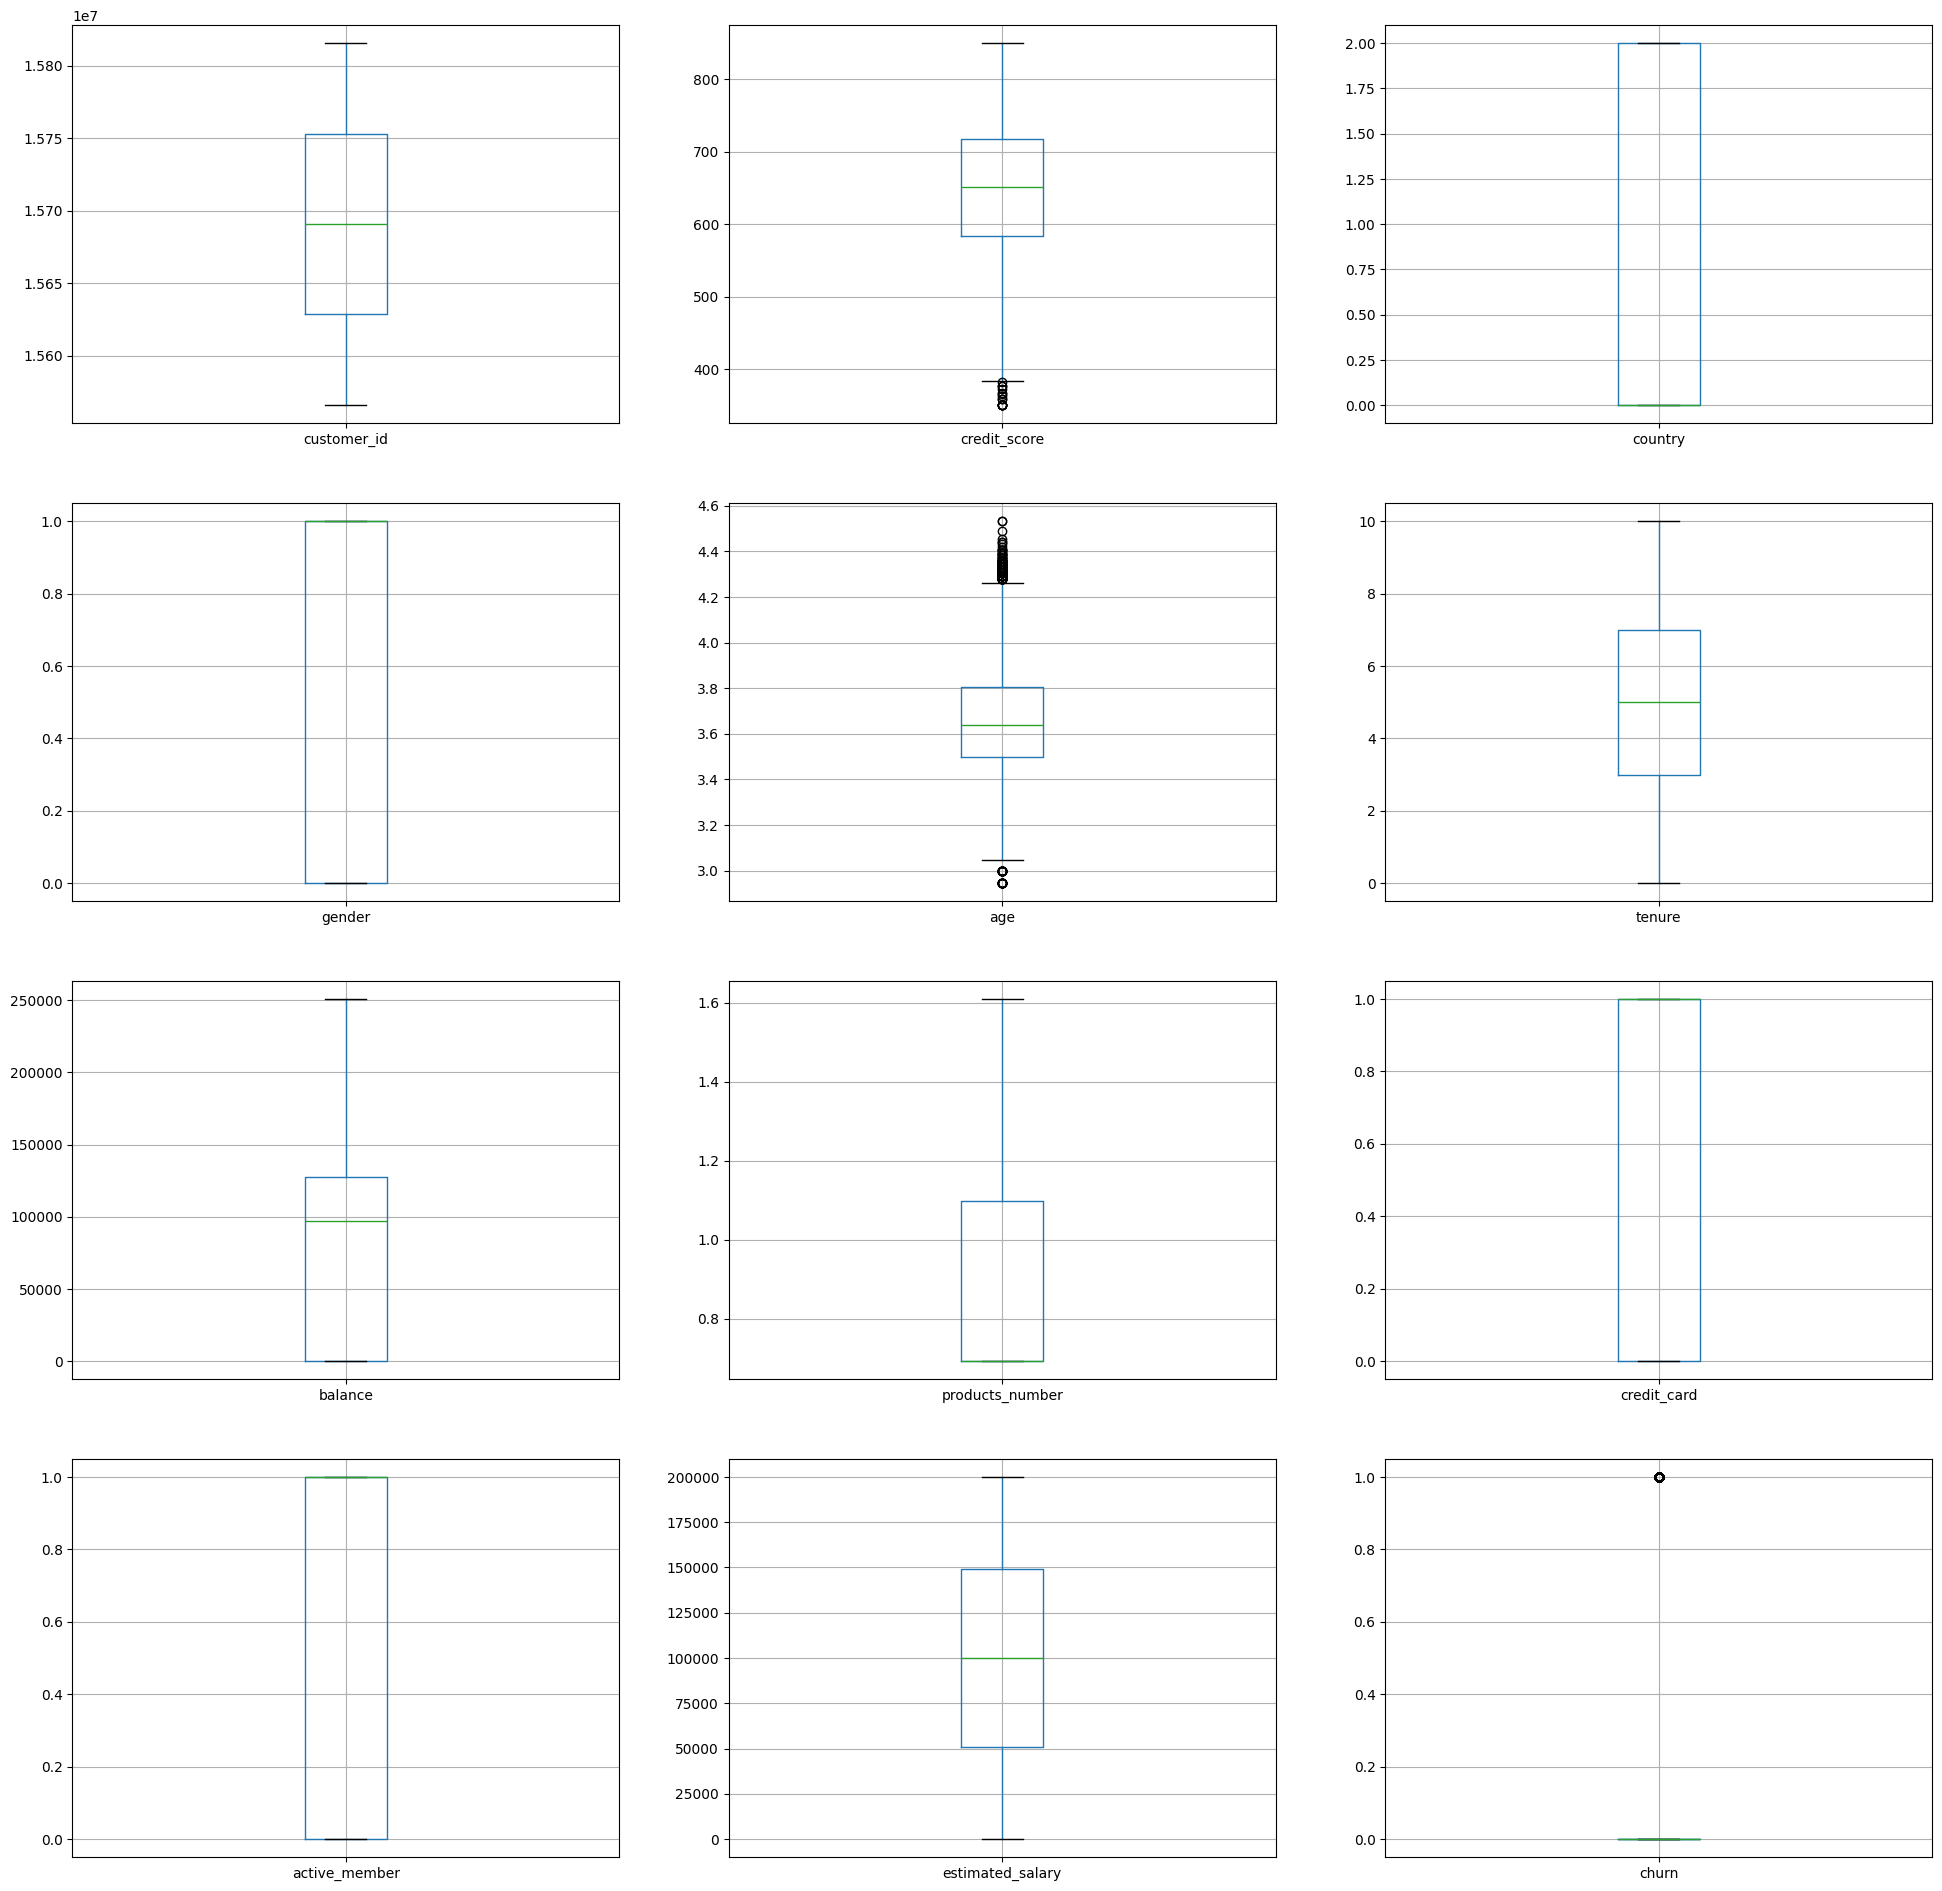

In [20]:
#Outlier Detaction
i=1
plt.figure(figsize=(24,30))
for col in df.columns:
    plt.subplot(5,3,i)
    df[[col]].boxplot()
    i+=1
plt.show()    

In [29]:
from sklearn.model_selection import train_test_split
x= df.drop(columns = ['churn'])
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size =0.2,random_state =42)

In [30]:
#Tune the hyperparameter
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import clone
original_model = RandomForestClassifier()
cloned_model = clone(original_model)
rr_model = Ridge()
rr_model.fit(x_train,y_train)
Ridge()
y_pred = rr_model.predict(x_test)
ls_model = Lasso()
ls_model.fit(x_train,y_train)
Lasso()
y_pred = ls_model.predict(x_test)

In [31]:
#Hyperparameter Tuning

In [32]:
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_rr_model = GridSearchCV(rr_model,param_grid,cv =5)
gscv_rr_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [33]:
gscv_rr_model.best_estimator_

Ridge(alpha=np.float64(2.7399999999999998))

In [34]:
rr_model.fit(x_train,y_train)
y_pred = rr_model.predict(x_test)

In [35]:
df["churn"].value_counts() #Handling imbalance

churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='churn'>

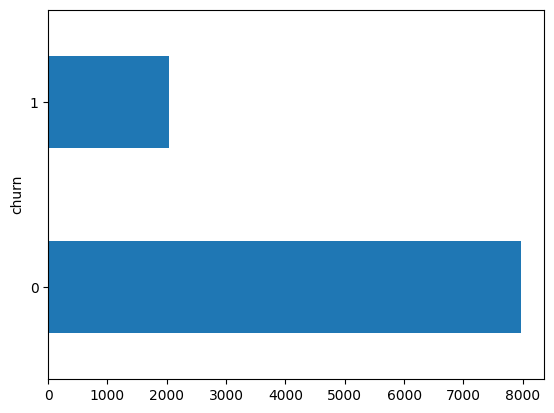

In [36]:
df["churn"].value_counts().plot(kind='barh')

In [37]:
from imblearn.over_sampling import RandomOverSampler

ramdom_oversampling = RandomOverSampler()
x= df.drop(["churn","customer_id"],axis=1)
y = df["churn"]
x_oversampled, y_oversampled = ramdom_oversampling.fit_resample(x,y)
y_oversampled.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

In [38]:
#Model Evaluation(Logistic Regression)
from sklearn.linear_model import LogisticRegression

In [39]:
x_train, x_test,y_train,y_test = train_test_split(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_oversampled,y_oversampled)
model = LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression()
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))


[[1261  788]
 [ 586 1347]]


In [40]:
df['churn'].unique()
array1=np.array([1, 0], dtype=np.int64)

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      2049
           1       0.63      0.70      0.66      1933

    accuracy                           0.65      3982
   macro avg       0.66      0.66      0.65      3982
weighted avg       0.66      0.65      0.65      3982



In [42]:
# Random Forest

In [77]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [78]:
#on test data
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[1908   83]
 [ 276  233]]


In [79]:
print("classification_report")
print(classification_report(y_test,y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1991
           1       0.74      0.46      0.56       509

    accuracy                           0.86      2500
   macro avg       0.81      0.71      0.74      2500
weighted avg       0.85      0.86      0.84      2500



In [80]:
#On train data
y_pred_train = rf_model.predict(x_train)

cong_matrix = confusion_matrix(y_train,y_pred_train)
print(conf_matrix)
print()
print(classification_report(y_train,y_pred_train))

[[1908   83]
 [ 276  233]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      1528

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [47]:
#Adaboost

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 33,stratify=y)
y_train.value_counts()


churn
0    5972
1    1528
Name: count, dtype: int64

In [49]:
y_test.value_counts()

churn
0    1991
1     509
Name: count, dtype: int64

In [50]:
ab_model = AdaBoostClassifier()
ab_model.fit(x_train,y_train)
AdaBoostClassifier()

AdaBoostClassifier()

In [51]:
#MODEL Evolution on test data

In [52]:
y_pred = ab_model.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[1896   95]
 [ 276  233]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1991
           1       0.71      0.46      0.56       509

    accuracy                           0.85      2500
   macro avg       0.79      0.71      0.73      2500
weighted avg       0.84      0.85      0.84      2500



In [54]:
#on trained data

In [55]:
y_pred_train = ab_model.predict(x_train)
conf_matrix = confusion_matrix(y_train,y_pred_train)
print(conf_matrix)

[[5730  242]
 [ 787  741]]


In [56]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5972
           1       0.75      0.48      0.59      1528

    accuracy                           0.86      7500
   macro avg       0.82      0.72      0.75      7500
weighted avg       0.85      0.86      0.85      7500



In [58]:
xgb_model = xgb.XGBClassifier(object='binary:logistic',random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, object='binary:logistic', ...)

In [59]:
y_pred = xgb_model.predict(x_test)
y_train.value_counts()

churn
0    5972
1    1528
Name: count, dtype: int64

In [60]:
y_test.value_counts()

churn
0    1991
1     509
Name: count, dtype: int64

In [70]:
xgb_model =XGBClassifier()
xgb_model.fit(x_train,y_train)
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred = xgb_model.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(classification_report(y_train,y_pred_train))

[[1886  105]
 [ 260  249]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5972
           1       0.75      0.48      0.59      1528

    accuracy                           0.86      7500
   macro avg       0.82      0.72      0.75      7500
weighted avg       0.85      0.86      0.85      7500



In [75]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',random_state=42)
param_grid ={
    'max_depth':[3,5,7],
    'learning_rate':[0.1,0.01],
    'n_estimators':[100,200,300],
    'min_child_weight':[1,3,5],
    'gamma':[0,0.1,0.2],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0],
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,cv=3,scoring ='accuracy')
grid_search.fit(x_train, y_train)
print('Best Parameter:',grid_search.best_score_)
best_model= grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Parameter: 0.8648000000000001
[[1909   82]
 [ 268  241]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.75      0.47      0.58       509

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500

